In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import random
import numpy as np
import gc

TOTAL_DATA_POINTS = 200
N_HIDDEN = 512
RESHAPED = 2
NB_CLASSES = 1
DROPOUT = 0.3
BATCH_SIZE = 15
EPOCHS = 5
VERBOSE = 1
VALIDATION_SPLIT = 0.25

#Want to make the schuffle happen the same way every time
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))

def get_dataset():
    rng = tf.random.Generator.from_seed(seed=234)
    randomNumbers = rng.truncated_normal(shape=[TOTAL_DATA_POINTS], mean=0.5, stddev=.05)
    return randomNumbers

random_dataset = get_dataset()

def convert_to_train_test_data(random_dataset, test_percent = 0.15):
    total_independent = []
    total_dependent = []
    
    for i in range(0, TOTAL_DATA_POINTS):
        if (i > (TOTAL_DATA_POINTS / 2)):
            total_dependent.append(1)
        else:
            total_dependent.append(0)

    random.shuffle(total_dependent)
    
    count = 0
    for i in total_dependent:
        total_independent.append([random_dataset[count].numpy() / (i + 1), random_dataset[count].numpy() ** (i + 1)])
        count = count + 1
            
    testRecordCount = int(round(test_percent*len(total_independent)))
    return total_independent[testRecordCount:], total_dependent[testRecordCount:], total_independent[:testRecordCount], total_dependent[:testRecordCount]
    
x_train, y_train, x_test, y_test = convert_to_train_test_data(random_dataset, test_percent=0.15)

def createModel(lossFunction):

    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_dense_layer', activation='relu'))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer', activation='relu'))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(NB_CLASSES, activation='sigmoid', name='output_dense_layer'))
    model.compile(optimizer='adam', loss=lossFunction, metrics=['accuracy'])
    
    return model

def displayResults(history):
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs = range(1, len(validation_loss)+1)

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(epochs, train_loss, label='train loss')
    ax.plot(epochs, validation_loss, label='validation loss')
    ax.set_xlabel('epoch')  # Add an x-label to the axes.
    ax.set_ylabel('loss')  # Add a y-label to the axes.
    ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.legend() 

def showPrediction(model, x_train, y_train, x_test, y_test):

    INDEX_1 = 0
    INDEX_2 = 1
    TRAINING_X_1 = []
    TRAINING_X_2 = []
    TEST_X_1 = []
    TEST_X_2 = []
    PREDICTED_INDEPENDANT_1 = []
    PREDICTED_INDEPENDANT_2 = []
    PREDICTED_DEPENDANT = []

    count = 0
    for p in y_train:
        TRAINING_X_1.append(x_train[count][INDEX_1])
        TRAINING_X_2.append(x_train[count][INDEX_2])
        count += 1
        
    count = 0
    for p in y_test:
        TEST_X_1.append(x_test[count][INDEX_1])
        TEST_X_2.append(x_test[count][INDEX_2])
        count += 1
    
    pred_traning = model.predict(np.array(x_train))

    count = 0
    for p in pred_traning:
        PREDICTED_INDEPENDANT_1.append(x_train[count][INDEX_1])
        PREDICTED_INDEPENDANT_2.append(x_train[count][INDEX_2])
        PREDICTED_DEPENDANT.append(0 if (p <= .5) else 1)
        count += 1

    pred_validation = model.predict(np.array(x_test))

    count = 0
    for p in pred_validation:
        PREDICTED_INDEPENDANT_1.append(x_test[count][INDEX_1])
        PREDICTED_INDEPENDANT_2.append(x_test[count][INDEX_2])
        PREDICTED_DEPENDANT.append(0 if (p <= .5) else 1)
        count += 1

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(TRAINING_X_1, y_train, label='training data', linewidth=0, marker='.')
    ax.plot(TEST_X_1, y_test, label='test data', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 
    
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(PREDICTED_INDEPENDANT_1, PREDICTED_DEPENDANT, label='prediction values', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 
    
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(TRAINING_X_2, y_train, label='training data', linewidth=0, marker='.')
    ax.plot(TEST_X_2, y_test, label='test data', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 
    
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(PREDICTED_INDEPENDANT_2, PREDICTED_DEPENDANT, label='prediction values', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 

print('done')

done


Epoch 1/5
9/9 [==============================] - 1s 62ms/step - loss: 0.6676 - accuracy: 0.4882 - val_loss: 0.6281 - val_accuracy: 0.5349
Epoch 2/5
9/9 [==============================] - 0s 16ms/step - loss: 0.6310 - accuracy: 0.4961 - val_loss: 0.5930 - val_accuracy: 0.5349
Epoch 3/5
9/9 [==============================] - 0s 17ms/step - loss: 0.5793 - accuracy: 0.4961 - val_loss: 0.5405 - val_accuracy: 0.5581
Epoch 4/5
9/9 [==============================] - 0s 16ms/step - loss: 0.5116 - accuracy: 0.7480 - val_loss: 0.4583 - val_accuracy: 0.8372
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 1.0000

Test accuracy: 1.0


2109

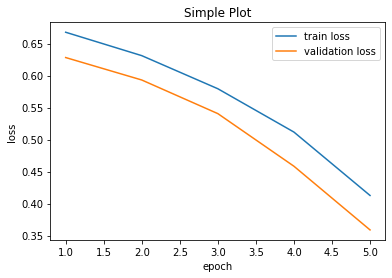

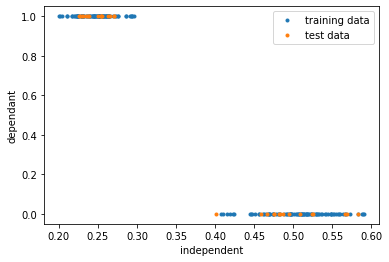

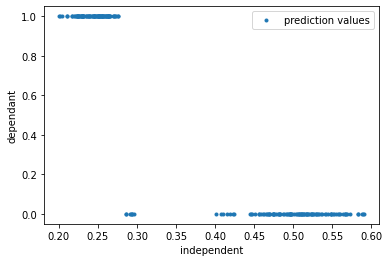

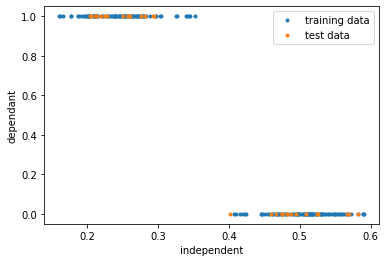

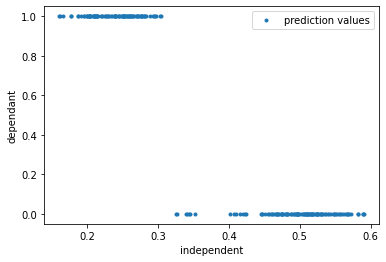

In [2]:
tf.random.set_seed(1234)
np.random.seed(0)
    
model = createModel('binary_crossentropy')

history = model.fit(np.array(x_train), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, y_train, x_test, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/5
9/9 [==============================] - 0s 41ms/step - loss: 0.9775 - accuracy: 0.4882 - val_loss: 0.9831 - val_accuracy: 0.5349
Epoch 2/5
9/9 [==============================] - 0s 18ms/step - loss: 0.9427 - accuracy: 0.4961 - val_loss: 0.9458 - val_accuracy: 0.5349
Epoch 3/5
9/9 [==============================] - 0s 18ms/step - loss: 0.9109 - accuracy: 0.4961 - val_loss: 0.9240 - val_accuracy: 0.5349
Epoch 4/5
9/9 [==============================] - 0s 18ms/step - loss: 0.8861 - accuracy: 0.4961 - val_loss: 0.8930 - val_accuracy: 0.5349
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 0.8136 - accuracy: 0.7333

Test accuracy: 0.7333333492279053


24469

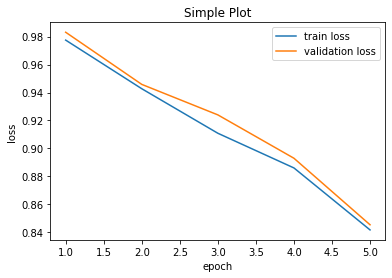

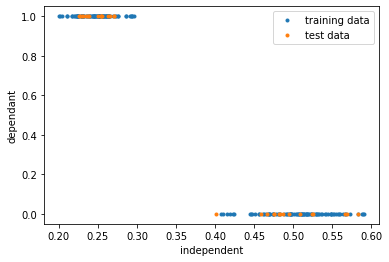

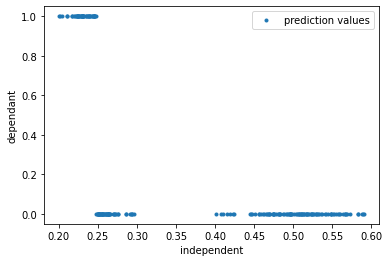

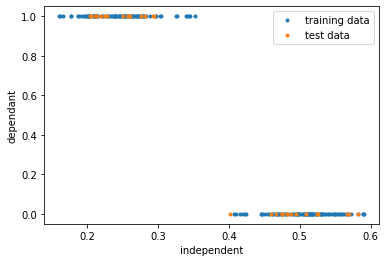

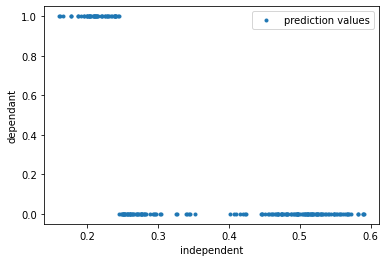

In [3]:
tf.random.set_seed(1234)
np.random.seed(0)
    
model = createModel('hinge')

history = model.fit(np.array(x_train), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, y_train, x_test, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/5
9/9 [==============================] - 0s 48ms/step - loss: 1.1169 - accuracy: 0.4882 - val_loss: 1.0224 - val_accuracy: 0.5349
Epoch 2/5
9/9 [==============================] - 0s 17ms/step - loss: 0.9406 - accuracy: 0.4961 - val_loss: 0.9287 - val_accuracy: 0.5349
Epoch 3/5
9/9 [==============================] - 0s 17ms/step - loss: 0.9000 - accuracy: 0.4961 - val_loss: 0.9189 - val_accuracy: 0.5349
Epoch 4/5
9/9 [==============================] - 0s 18ms/step - loss: 0.8850 - accuracy: 0.4961 - val_loss: 0.8975 - val_accuracy: 0.5349
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.5000

Test accuracy: 0.5


25047

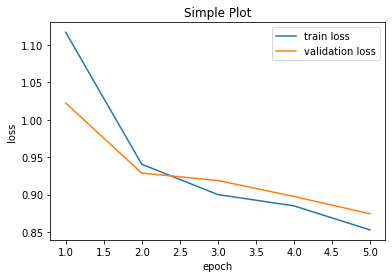

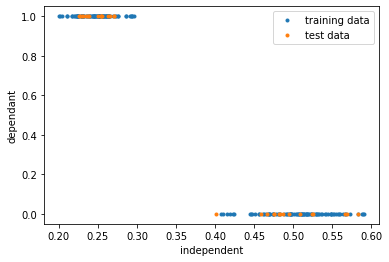

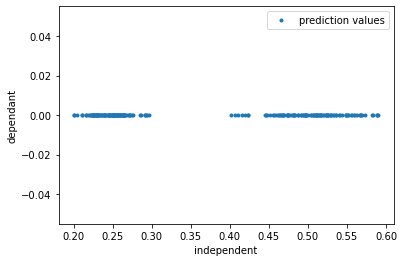

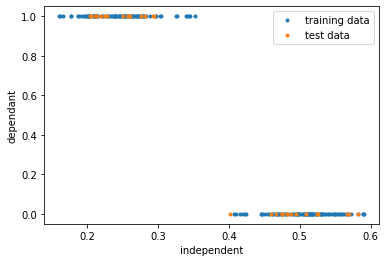

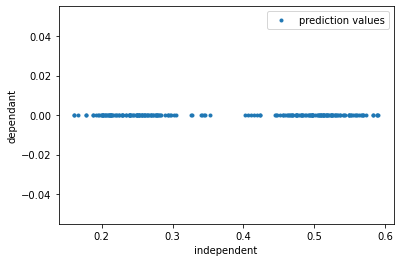

In [4]:
tf.random.set_seed(1234)
np.random.seed(0)
    
model = createModel('squared_hinge')

history = model.fit(np.array(x_train), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)

showPrediction(model, x_train, y_train, x_test, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()